In this notebook try keeping the V columns and see how that effects the results

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastbook import *
from utils import *
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.metrics import accuracy_score, roc_auc_score 

path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
Path.BASE_PATH = path
pd.options.display.max_rows = 20
pd.options.display.max_columns = 12

/opt/anaconda3/envs/fastaiV2/lib/python3.8/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
path.ls()

(#22) [Path('test_transaction.csv'),Path('train_s.csv'),Path('train_ss.csv'),Path('train_04.csv'),Path('nn_full_weighted.pkl'),Path('train_identity.csv'),Path('test.csv'),Path('valid_xs_final_full.pkl'),Path('xs_final.pkl'),Path('to2.pkl')...]

In [4]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)

In [5]:
train_s.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,...,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
67118,3054118,0,1529352,50.000,S,6394,...,T,F,T,T,desktop,Windows
299740,3286740,0,7411014,150.000,R,10356,...,T,F,T,F,desktop,Windows
111691,3098691,0,2173095,50.000,H,12598,...,T,F,F,T,mobile,iOS Device
346496,3333496,0,8545631,77.000,W,11916,...,NaN,NaN,NaN,NaN,NaN,NaN
433796,3420796,0,10965876,130.500,W,11802,...,NaN,NaN,NaN,NaN,NaN,NaN
152709,3139709,0,3169255,604.950,W,15063,...,NaN,NaN,NaN,NaN,NaN,NaN
165414,3152414,0,3527296,77.000,W,7676,...,NaN,NaN,NaN,NaN,NaN,NaN
588471,3575471,0,15765366,47.950,W,6489,...,NaN,NaN,NaN,NaN,NaN,NaN
174601,3161601,0,3786460,171.000,W,1359,...,NaN,NaN,NaN,NaN,NaN,NaN
434801,3421801,0,10987852,265.000,W,1893,...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_s.shape

(59054, 434)

In [7]:
train_s.columns.to_list()

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [8]:
train_s.columns[0]

'TransactionID'

In [9]:
dep_var = 'isFraud'

In [10]:
procs = [Categorify, FillMissing]

In [11]:
train_s['TransactionDT']

67118      1529352
299740     7411014
111691     2173095
346496     8545631
433796    10965876
            ...   
14993       417578
430610    10878459
163787     3463586
113416     2214972
279122     6803313
Name: TransactionDT, Length: 59054, dtype: int64

To create a validation set we will take rows with transaction numbers greate than a certain value. These rows are transactions that occour later in time. This seems like a good idea since the test set consists of transactions that happen in the future with respect to our data set.

In [12]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)
cut_off

12579548

In [13]:
cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [14]:
np.where(cond)[0]

array([    0,     1,     2, ..., 59051, 59052, 59053])

In [28]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2','V3','V4','V5','V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V240',
 'V241',
 'V242',
 'V243',
 'V244',
 'V245',
 'V246',
 'V247',
 'V248',
 'V249',
 'V250',
 'V251',
 'V252',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 'V259',
 'V260',
 'V261',
 'V262',
 'V263',
 'V264',
 'V265',
 'V266',
 'V267',
 'V268',
 'V269',
 'V270',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V276',
 'V277',
 'V278',
 'V279',
 'V280',
 'V281',
 'V282',
 'V283',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337','V338','V339']


In [23]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2','V3','V4','V5','V6','V7','V8', 'V9','V10', 'V11', 'V12',
        'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
        'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33',
        'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 
        'V46', 'V47','V48',
        'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 
        'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75',
        'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91',
        'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106',
        'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
        'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134',
        'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 
        'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161',
        'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',
        'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188',
        'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200','V201', 'V202',
        'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 
        'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225','V226', 'V227', 'V228', 'V229', 'V230','V231',
        'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
        'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258',
        'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272',
        'V273','V274', 'V275', 'V276', 'V277', 'V278', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301',
        'V302','V303','V304','V305','V306','V307','V308','V309',
        'V310','V311','V312','V313','V314','V315','V316','V317','V318','V319','V320','V321','V322','V323','V324',
        'V325','V326','V327','V328','V329','V330','V331','V332','V333','V334','V335','V336', 'V337','V338','V339']



In [29]:
len(cont),len(cat)

(384, 49)

In [30]:
assert len(cat)+len(cont)==(len(train_s.columns)-1)

In [31]:
to = TabularPandas(train_s, procs, cat, cont, y_names=dep_var, splits=splits)

In [31]:
to.show()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na,V1_na,V2_na,V3_na,V4_na,V5_na,V6_na,V7_na,V8_na,V9_na,V10_na,V11_na,V12_na,V13_na,V14_na,V15_na,V16_na,V17_na,V18_na,V19_na,V20_na,V21_na,V22_na,V23_na,V24_na,V25_na,V26_na,V27_na,V28_na,V29_na,V30_na,V31_na,V32_na,V33_na,V34_na,V35_na,V36_na,V37_na,V38_na,V39_na,V40_na,V41_na,V42_na,V43_na,V44_na,V45_na,V46_na,V47_na,V48_na,V49_na,V50_na,V51_na,V52_na,V53_na,V54_na,V55_na,V56_na,V57_na,V58_na,V59_na,V60_na,V61_na,V62_na,V63_na,V64_na,V65_na,V66_na,V67_na,V68_na,V69_na,V70_na,V71_na,V72_na,V73_na,V74_na,V75_na,V76_na,V77_na,V78_na,V79_na,V80_na,V81_na,V82_na,V83_na,V84_na,V85_na,V86_na,V87_na,V88_na,V89_na,V90_na,V91_na,V92_na,V93_na,V94_na,V95_na,V96_na,V97_na,V98_na,V99_na,V100_na,V101_na,V102_na,V103_na,V104_na,V105_na,V106_na,V107_na,V108_na,V109_na,V110_na,V111_na,V112_na,V113_na,V114_na,V115_na,V116_na,V117_na,V118_na,V119_na,V120_na,V121_na,V122_na,V123_na,V124_na,V125_na,V126_na,V127_na,V128_na,V129_na,V130_na,V131_na,V132_na,V133_na,V134_na,V135_na,V136_na,V137_na,V138_na,V139_na,V140_na,V141_na,V142_na,V143_na,V144_na,V145_na,V146_na,V147_na,V148_na,V149_na,V150_na,V151_na,V152_na,V153_na,V154_na,V155_na,V156_na,V157_na,V158_na,V159_na,V160_na,V161_na,V162_na,V163_na,V164_na,V165_na,V166_na,V167_na,V168_na,V169_na,V170_na,V171_na,V172_na,V173_na,V174_na,V175_na,V176_na,V177_na,V178_na,V179_na,V180_na,V181_na,V182_na,V183_na,V184_na,V185_na,V186_na,V187_na,V188_na,V189_na,V190_na,V191_na,V192_na,V193_na,V194_na,V195_na,V196_na,V197_na,V198_na,V199_na,V200_na,V201_na,V202_na,V203_na,V204_na,V205_na,V206_na,V207_na,V208_na,V209_na,V210_na,V211_na,V212_na,V213_na,V214_na,V215_na,V216_na,V217_na,V218_na,V219_na,V220_na,V221_na,V222_na,V223_na,V224_na,V225_na,V226_na,V227_na,V228_na,V229_na,V230_na,V231_na,V232_na,V233_na,V234_na,V235_na,V236_na,V237_na,V238_na,V239_na,V240_na,V241_na,V242_na,V243_na,V244_na,V245_na,V246_na,V247_na,V248_na,V249_na,V250_na,V251_na,V252_na,V253_na,V254_na,V255_na,V256_na,V257_na,V258_na,V259_na,V260_na,V261_na,V262_na,V263_na,V264_na,V265_na,V266_na,V267_na,V268_na,V269_na,V270_na,V271_na,V272_na,V273_na,V274_na,V275_na,V276_na,V277_na,V278_na,V279_na,V280_na,V281_na,V282_na,V283_na,V284_na,V285_na,V286_na,V287_na,V288_na,V289_na,V290_na,V291_na,V292_na,V293_na,V294_na,V295_na,V296_na,V297_na,V298_na,V299_na,V300_na,V301_na,V302_na,V303_na,V304_na,V305_na,V306_na,V307_na,V308_na,V309_na,V310_na,V311_na,V312_na,V313_na,V314_na,V315_na,V316_na,V317_na,V318_na,V319_na,V320_na,V321_na,V322_na,V323_na,V324_na,V325_na,V326_na,V327_na,V328_na,V329_na,V330_na,V331_na,V332_na,V333_na,V334_na,V335_na,V336_na,V337_na,V338_na,V339_na,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155

In [51]:
to.items.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,...,V334_na,V335_na,V336_na,V337_na,V338_na,V339_na
57195,3044195,0,1316341,418.950012,5,1233,...,2,2,2,2,2,2
312877,3299877,0,7780176,59.000000,5,3740,...,2,2,2,2,2,2
195195,3182195,1,4394717,29.000000,5,1196,...,2,2,2,2,2,2
21600,3008600,0,572518,24.000000,5,2236,...,2,2,2,2,2,2
12253,2999253,0,348181,57.950001,5,3916,...,2,2,2,2,2,2


In [52]:
to.classes['ProductCD']

(#6) ['#na#','C','H','R','S','W']

In [53]:
(path/'to2.pkl').save(to)

In [36]:
to = (path/'to2.pkl').load()

In [32]:
xs, y             = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [33]:
xs.shape, valid_xs.shape

((48246, 800), (10808, 800))

The number of columns has increased from 95 to 122 because the FillMissing proc has created new columns to indicate where data was missing.

In [39]:
np.array(xs.columns.to_list())

array(['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType',
       'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'dist1_na', 'dist2_na', 'D1_na', 'D2_na', 'D3_na', 'D4_na', 'D5_na', 'D6_na', 'D7_na', 'D8_na', 'D9_na', 'D10_na',
       'D11_na', 'D12_na', 'D13_na', 'D14_na', 'D15_na', 'id_01_na', 'id_02_na', 'id_03_na', 'id_04_na', 'id_05_na', 'id_06_na', 'id_07_na', 'id_08_na', 'id_09_na', 'id_10_na', 'id_11_na', 'V1_na',
       'V2_na', 'V3_na', 'V4_na', 'V5_na', 'V6_na', 'V7_na', 'V8_na', 'V9_na', 'V10_na', 'V11_na', 'V12_na', 'V13_na', 'V14_na', 'V15_na', 'V16_na', 'V17_na', 'V18_na', 'V19_na', 'V20_na', 'V21_na',
       'V22_na', 'V23_n

# Decision Trees

In [34]:
def m_roc(y, xs):
    preds = m.predict_proba(xs)
    preds_isFraud = preds[:,1]
    return roc_auc_score(y, preds_isFraud)

In [37]:
m = DecisionTreeClassifier(max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8806740565928218, 0.8455903185136241)

In [41]:
m = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.853887543470749, 0.8415603579531143)

In [43]:
m = DecisionTreeClassifier(max_leaf_nodes=50, criterion='entropy', max_features='sqrt', class_weight='balanced')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.854758458114059, 0.8494567241052684)

# Random forests

In [44]:
def rf(xs, y, **kwargs):
    max_samples = math.ceil(len(xs)*0.66)
    return RandomForestClassifier(n_jobs=-1, 
        max_samples=max_samples, oob_score=True, **kwargs).fit(xs, y)

In [45]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8912458370130691, 0.8754374067149959)

In [46]:
m = rf(xs, y, n_estimators=1000, class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8914664632988313, 0.8761898563498646)

In [47]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy', 
       max_features='sqrt', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8911690932117582, 0.8757335476645391)

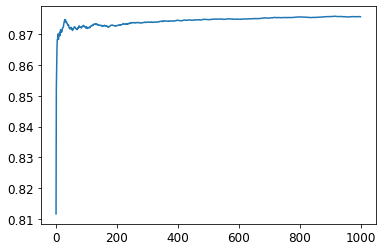

In [48]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
plt.plot([roc_auc_score(valid_y, preds[:i+1,:,1:2].mean(0)) for i in range(1000)])

In [49]:
m = rf(xs, y, n_estimators=200, max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8905040571727719, 0.8764423261871587)

In [50]:
m = rf(xs, y, n_estimators=200, class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8913105470949024, 0.8774442213440685)

In [51]:
m = rf(xs, y, n_estimators=200, max_leaf_nodes=50, criterion='entropy', 
       max_features='sqrt', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8907471965926529, 0.8773359508580224)

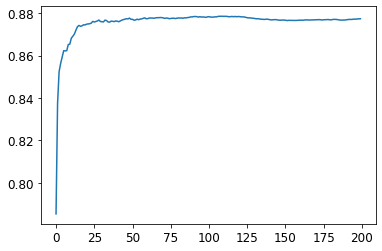

In [52]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
plt.plot([roc_auc_score(valid_y, preds[:i+1,:,1:2].mean(0)) for i in range(200)])

In [53]:
%%time
m = rf(xs, y, n_estimators=1000,  criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 7min 50s, sys: 9.23 s, total: 8min
Wall time: 1min 55s


(0.9999998542839216, 0.8836964487522523)

## OOB Error

In [54]:
m.oob_decision_function_.shape
oob_preds = m.oob_decision_function_[:,1:2]
roc_auc_score(y, oob_preds)

0.8902393396302756

# Model interpretation (TBD)

Qs:

1. How confident are we in our predictions using a particular row
2. What are the most important factors when predicting a particular row and how did the influence it
3. Overall which columns are strongest predictors, which can we trow away?
4. Which columns are redundant, so both are not needed?
5. How do predictions vary as we vary these colummns

## Tree variance for prediction confidence

In [63]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
roc_auc_score(valid_y,preds[:,:,1:2].mean(0))
preds[:,:,1:2].std(0).transpose()

array([[0.10430244, 0.43126674, 0.13652472, ..., 0.12155246, 0.11749043, 0.14668333]])

For items where std is large, trees dont agree, unsure, maybe put these items through a different classifier and try again for more confidant predictions.

## Feature importance

In [64]:
def rf_feature_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [65]:
fi = rf_feature_importance(m, xs)
fi[:10]

,cols,imp
416,TransactionID,0.026381
417,TransactionDT,0.025599
418,TransactionAmt,0.023870
1,card1,0.022793
2,card2,0.021706
433,C13,0.019936
7,addr1,0.017950
434,C14,0.015703
421,C1,0.011890
5,card5,0.011879


<AxesSubplot:ylabel='cols'>

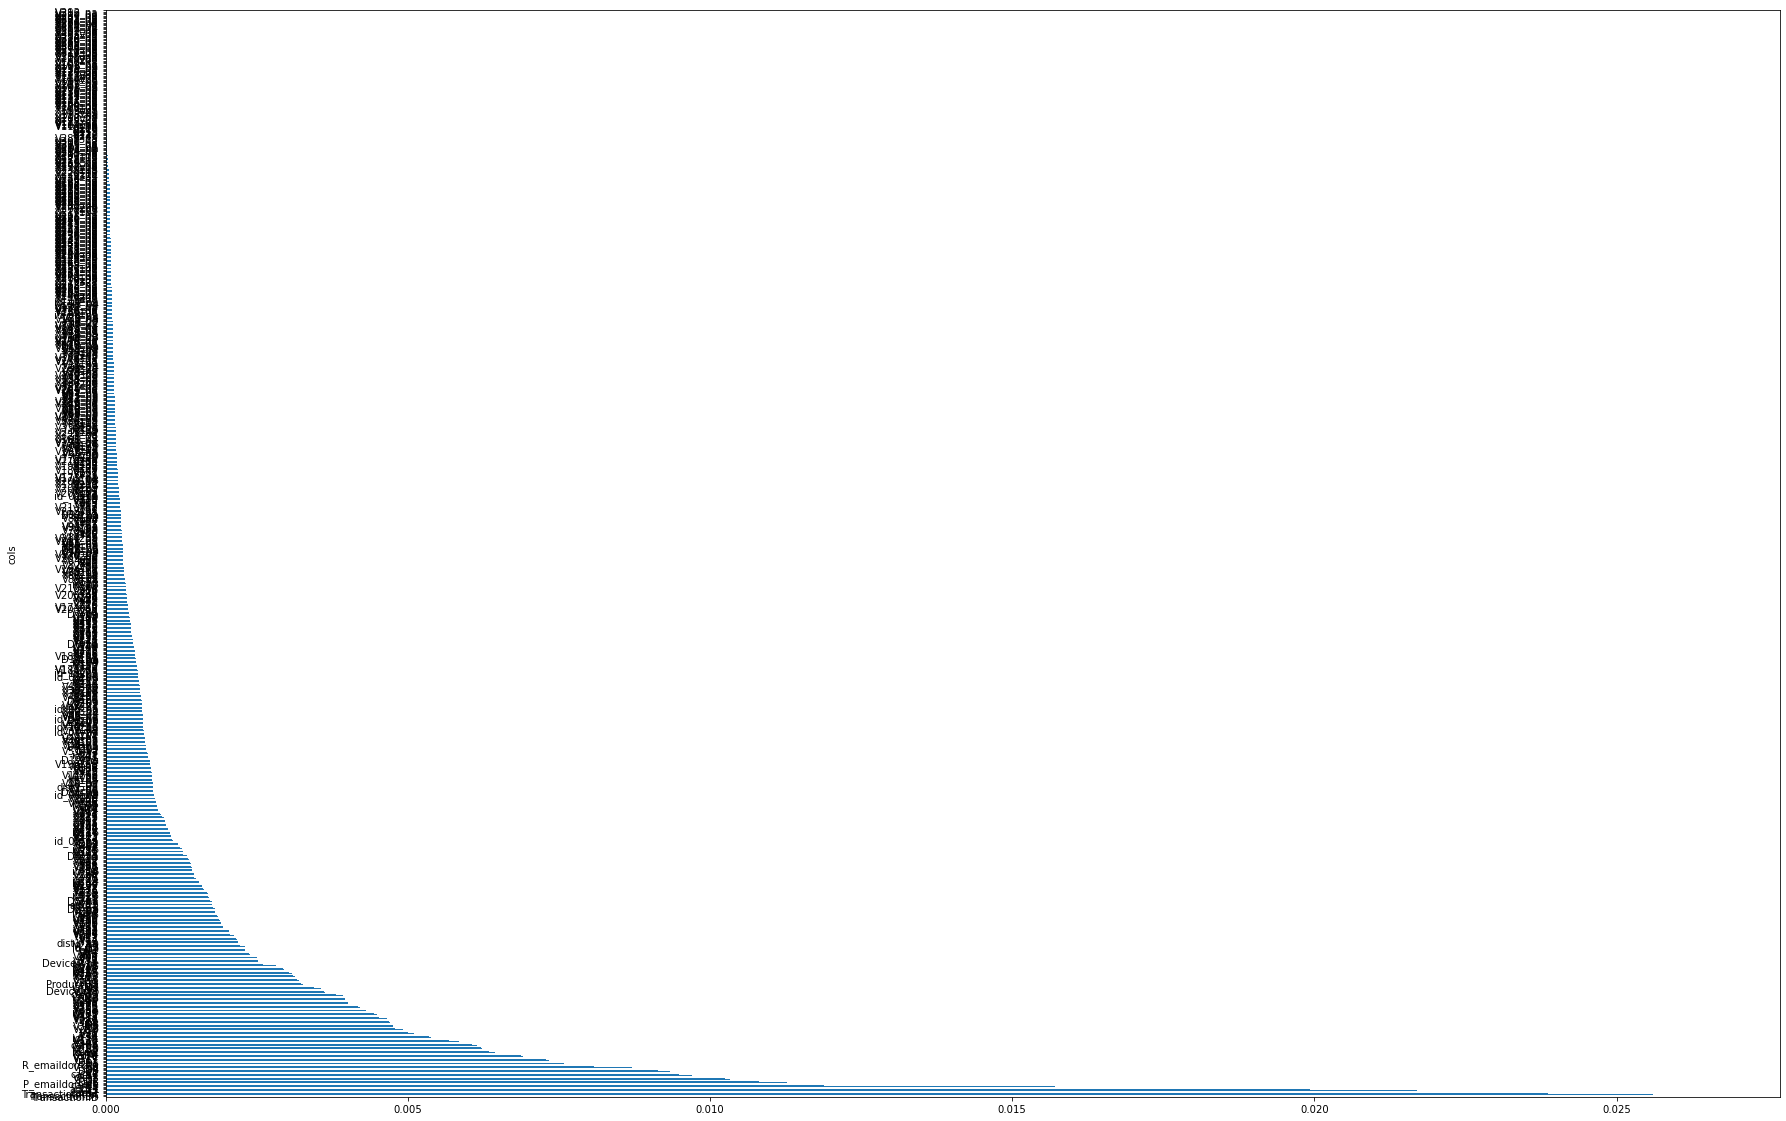

In [68]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(30,20), legend=False)
                   
plot_fi(fi)

## Removing low-importance features

In [69]:
to_keep = fi[fi.imp>0.0001].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 592


(0.9999962141140345, 0.8461674385133744)

In [70]:
to_keep = fi[fi.imp>0.001].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 200


(0.9999943876962045, 0.8422941811119133)

In [71]:
to_keep = fi[fi.imp>0.002].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 123


(0.9999906743831328, 0.8522345623312629)

In [72]:
to_keep = fi[fi.imp>0.003].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 92


(0.9999983368711812, 0.848764524381354)

In [73]:
to_keep = fi[fi.imp>0.004].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 70


(0.9999976050945011, 0.8483888184134122)

In [74]:
to_keep = fi[fi.imp>0.005].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 48


(0.999998022388641, 0.8502080473466985)

In [75]:
to_keep = fi[fi.imp>0.006].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 39


(0.999996195970811, 0.8445615058583686)

In [76]:
to_keep = fi[fi.imp>0.007].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 29


(0.9999948352290502, 0.8425189636017982)

In [77]:
to_keep = fi[fi.imp>0.008].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 23


(0.9999954400031662, 0.8344062256335382)

In [78]:
to_keep = fi[fi.imp>0.009].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 20


(0.9999988388336974, 0.8363750424388807)

In [79]:
to_keep = fi[fi.imp>0.01].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 14


(0.9999929120473616, 0.8348340202354994)

In [80]:
to_keep = fi[fi.imp>0.002].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 123


(0.9999952222844845, 0.8565023577452727)

In [81]:
xs_imp.columns.shape
m.feature_importances_.shape

(123,)

<AxesSubplot:ylabel='cols'>

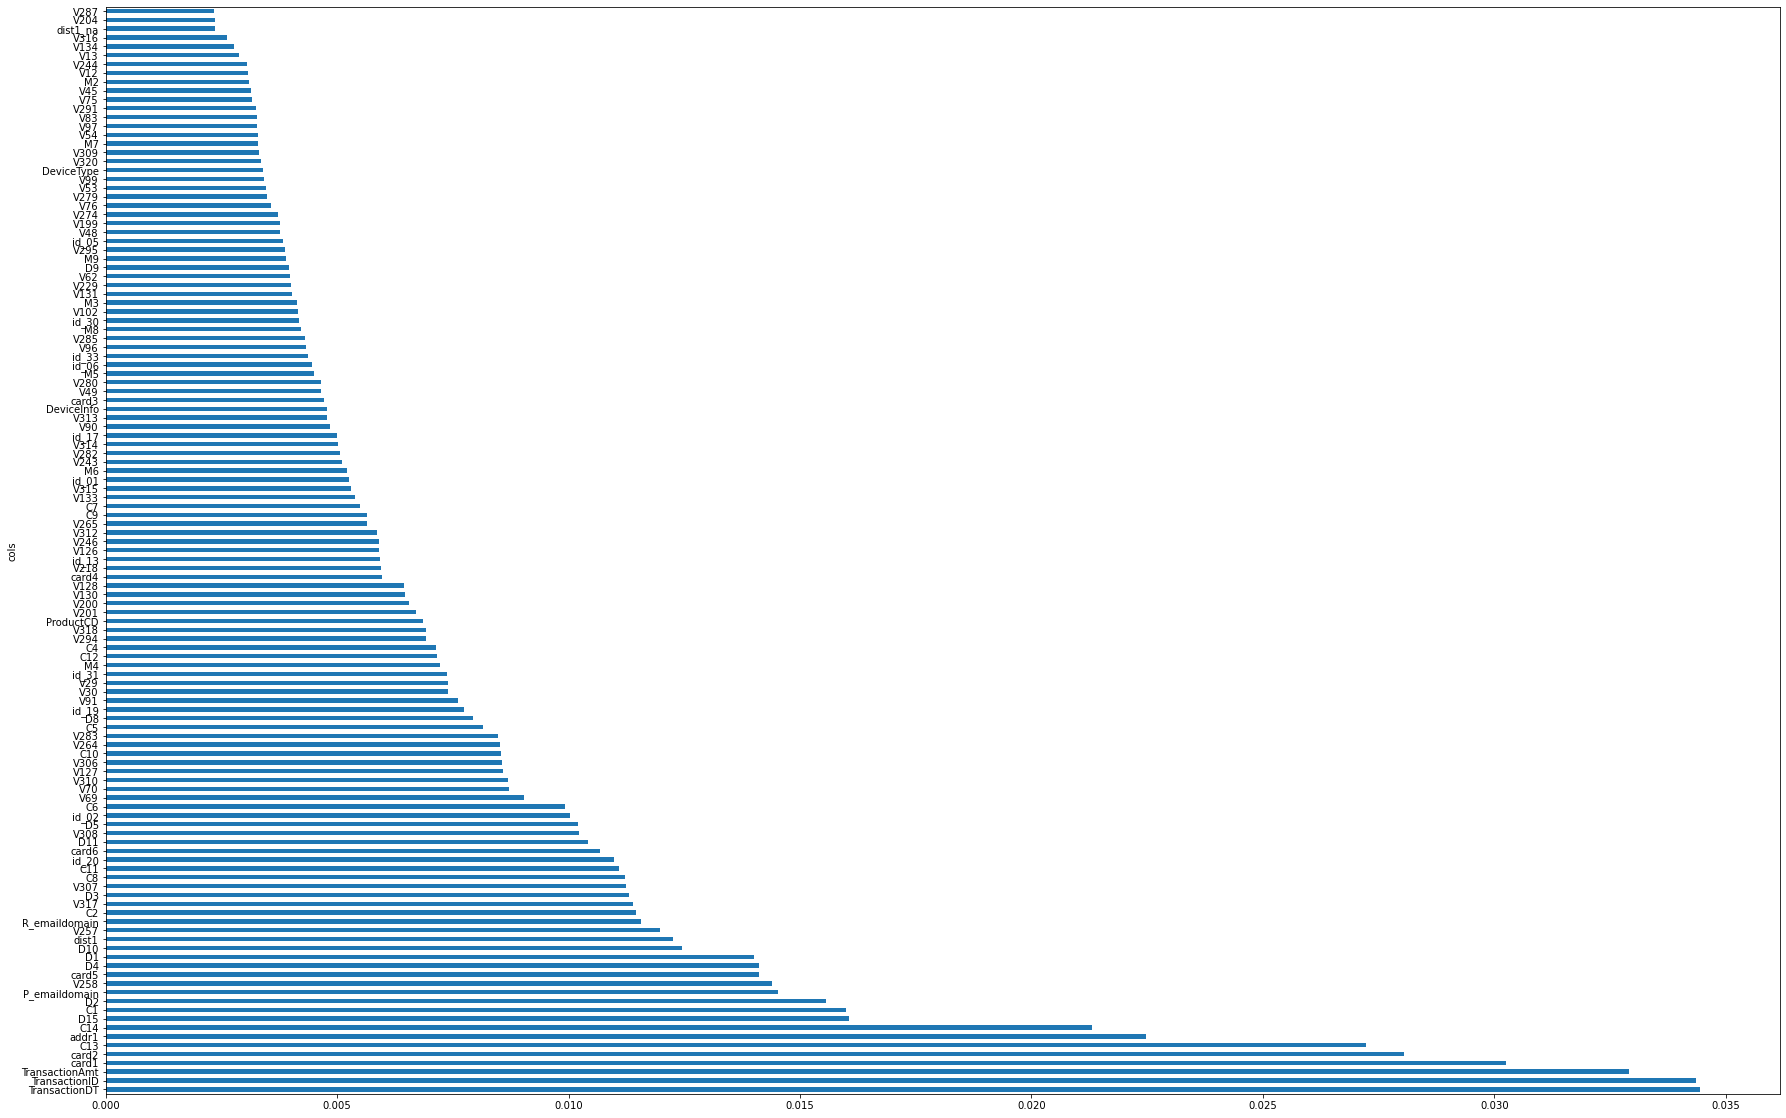

In [82]:
plot_fi(rf_feature_importance(m, xs_imp))

##  Remove redundant features

In [83]:
xs_imp.shape, valid_xs_imp.shape

((48378, 123), (10676, 123))

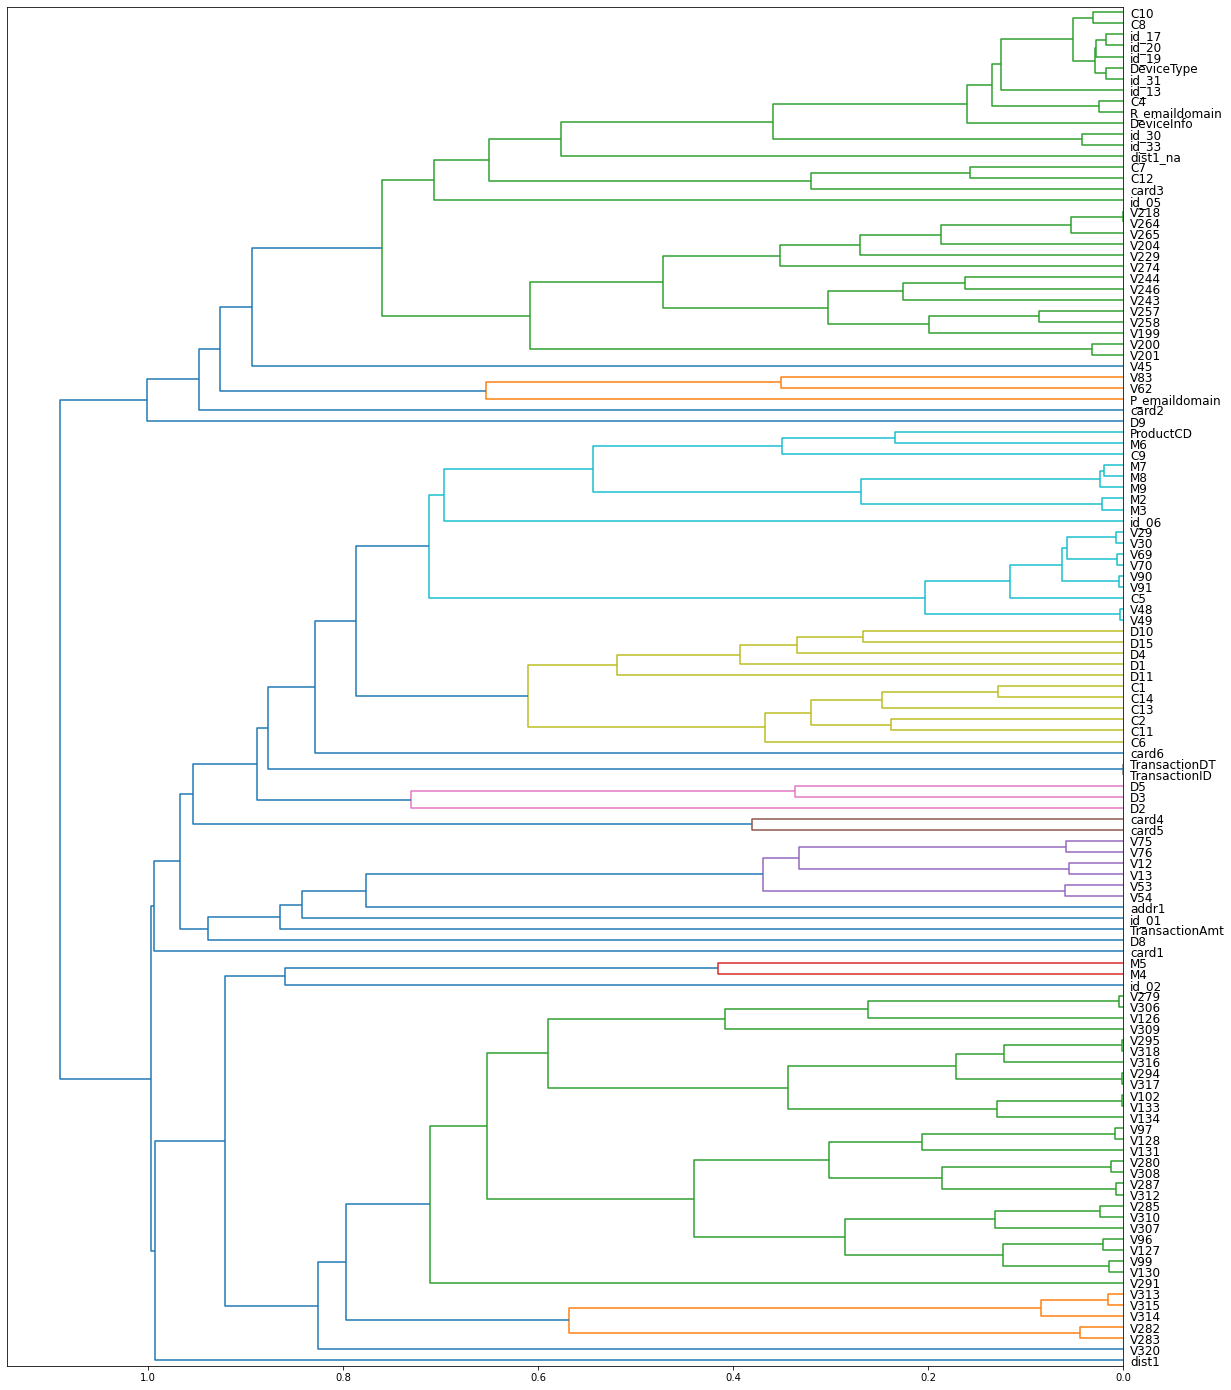

In [86]:
cluster_columns(xs_imp, figsize=(20,25))

This suggests that one of TransactionID or TransactionDT is redundant.
Other possible redundant groups: (C8,C10),(id17,id20),(devicetype,id31),(C4,R_emaildomain),(id30,id33),(218,264,265)
,(200,201),(m7,m8,m9),(m2,m3),(29,30),(69,70),(90,91),(48,49),(75,76),(12,13),(53,54),(279,306),(295,318),(294,317),
(102,133),(97,128),(280,308),(287,312),(285,310),(96,127),(99,130),(313,315),(282,283)

In [87]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=40, class_weight='balanced', max_leaf_nodes=50,
        max_features='sqrt', n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return roc_auc_score(y,  m.oob_decision_function_[:,1:2])

In [88]:
get_oob(xs_imp)

0.8640830289061707

In [89]:
# This will take too long for this many features, for now i chose 1 randomly.
# {c:get_oob(xs_imp.drop(c, axis=1)) for c in (
#     'TransactionID', 'TransactionDT', 'id_17', 'id_20', 'id_36', 'id_28', 'DeviceType')}

In [90]:
to_drop = ['TransactionID', 'id_17', 'id_31', 'C4', 'id_30', 'V264',
          'V265', 'V200', 'M8', 'M9', 'M3', 'V30', 'V69', 'V91', 'V49',
          'V75', 'V12', 'V54', 'V279', 'V318', 'V294', 'V102', 'V128',
          'V280', 'V287', 'V310', 'V96', 'V130', 'V315', 'V282']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8638807440598845

In [91]:
xs_imp.shape, valid_xs_imp.shape

((48378, 123), (10676, 123))

In [92]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [93]:
(path/'xs_final_full.pkl').save(xs_final)
(path/'valid_xs_final_full.pkl').save(valid_xs_final)

In [94]:
xs_final = (path/'xs_final_full.pkl').load()
valid_xs_final = (path/'valid_xs_final_full.pkl').load()

In [95]:
m = rf(xs_final, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_final), m_roc(valid_y, valid_xs_final)

(0.9999996915652009, 0.8568988991668223)

## Partial dependance

In [96]:
valid_xs_final.columns

Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'C13', 'addr1',
       'C14', 'C1', 'card5', 'P_emaildomain', 'D15', 'D2', 'D1', 'V307',
       'dist1', 'C11', 'card6', 'C2', 'D10', 'D3', 'D4', 'V308', 'C6',
       'R_emaildomain', 'D5', 'D11', 'C5', 'V317', 'V127', 'V70', 'M4',
       'id_02', 'V258', 'C8', 'id_20', 'card4', 'V283', 'V306', 'C12', 'V90',
       'C10', 'V257', 'M6', 'M5', 'D8', 'C9', 'V29', 'V314', 'V312', 'V201',
       'id_19', 'V133', 'V313', 'V126', 'V285', 'V295', 'id_13', 'card3',
       'V246', 'DeviceInfo', 'V199', 'M7', 'id_01', 'ProductCD', 'V99', 'V243',
       'V131', 'C7', 'V218', 'id_06', 'V291', 'V48', 'V134', 'id_05', 'V316',
       'DeviceType', 'V274', 'V97', 'V76', 'V45', 'V309', 'V62', 'M2', 'D9',
       'id_33', 'V244', 'dist1_na', 'V13', 'V83', 'V53', 'V229', 'V204',
       'V320'],
      dtype='object')

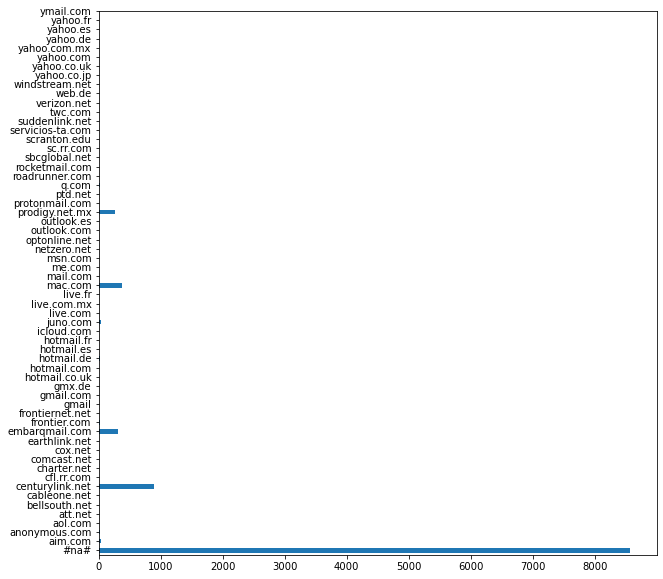

In [98]:
p = valid_xs_final['R_emaildomain'].value_counts(sort=False).plot.barh(figsize=(10,10))
c = to.classes['R_emaildomain']
plt.yticks(range(len(c)), c);

In [1153]:
# I want to look at the Fraud column for all values in the training set where R_emaildomain is missing
n = 1000
pd.options.display.max_rows = n
train_ss[['isFraud','R_emaildomain']].head(n)

,isFraud,R_emaildomain
57195,0,NaN
312877,0,NaN
195195,1,NaN
21600,0,NaN
12253,0,NaN
377675,0,anonymous.com
160611,0,gmail.com
86738,0,hotmail.com
426550,0,NaN
34293,0,NaN


In [99]:
pd.options.display.max_rows = 20

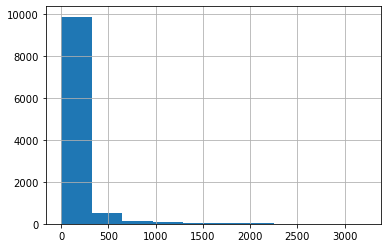

In [101]:
ax = valid_xs_final['TransactionAmt'].hist()

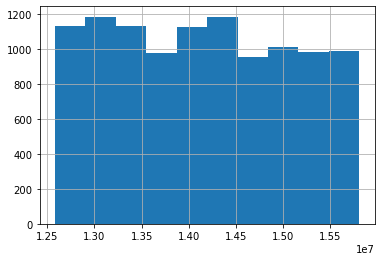

In [102]:
ax = valid_xs_final['TransactionDT'].hist()

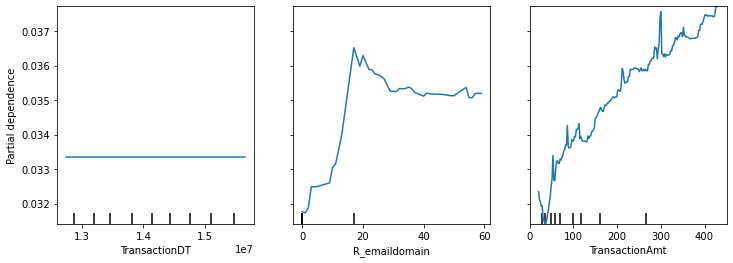

In [103]:
from sklearn.inspection import plot_partial_dependence

_, ax = plt.subplots(figsize=(12,4))
plot_partial_dependence(m, valid_xs_final, ['TransactionDT','R_emaildomain', 'TransactionAmt'],
                        grid_resolution=200, ax=ax)

In [104]:
valid_xs_final['R_emaildomain'].unique()

array([ 0,  2, 55, 17, 20, 36, 54, 35,  5, 42, 31, 10, 24, 43, 22,  3, 32, 57, 25, 11, 27, 50, 18, 40, 58, 34,  4, 26, 46, 59, 56, 19, 49, 29, 37,  9, 41, 13, 23,  1, 33], dtype=int8)

## Tree Interperator

In [105]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [106]:
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [107]:
row = valid_xs_final[:5]

In [108]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [109]:
prediction[0,1],bias[0,1] + contributions[0].sum(axis=0)[1]

(0.005, 0.004999999999999782)

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/fastaiV2/lib/python3.8/site-packages/matplotlib/pyplot.py'>

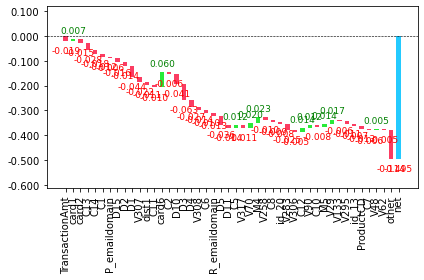

In [110]:
waterfall(valid_xs_final.columns, contributions[0][:,1], threshold=0.08, 
          rotation_value=90, formatting='{:,.3f}')

## Finding Out-of-Domain Data

In [111]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feature_importance(m, df_dom)[:6]

,cols,imp
0,TransactionDT,0.800881
2,card1,0.020006
10,D15,0.017630
61,M7,0.013020
18,D10,0.010024
20,D4,0.009434


In [112]:
m = rf(xs_final, y, n_estimators=200, class_weight='balanced')
print('orig', m_roc(valid_y, valid_xs_final))

for c in ('TransactionDT','D15','card1','M7'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_roc(valid_y, valid_xs_final.drop(c,axis=1)))

orig 0.8456716615659874
TransactionDT 0.8339493148207657
D15 0.8411513030572821
card1 0.8393085674583873
M7 0.8349925566677592


Can try droping columns that are older to see if keeping just more recent data makes a difference

<AxesSubplot:>

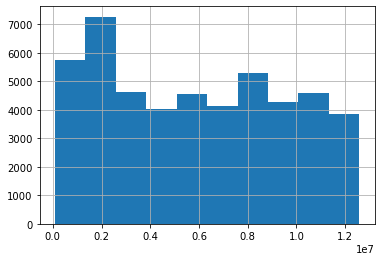

In [113]:
xs['TransactionDT'].hist()

In [138]:
filt = xs['TransactionDT']>=0
xs_filt = xs_final[filt]
y_filt = y[filt]

In [140]:
%%time
m = rf(xs_filt, y_filt, n_estimators=1000,  criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

CPU times: user 6min 30s, sys: 5.32 s, total: 6min 35s
Wall time: 1min 9s


(0.9999999032361415, 0.8587288129481127)

In [126]:
filt = xs['TransactionDT']>0.4e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(0.9999994561634254, 0.8535112681071446)

In [117]:
filt = xs['TransactionDT']>1e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.844350880792089)

In [118]:
filt = xs['TransactionDT']>1.2e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.8046730984109227)

In [ ]:
xs[cat].nunique()

In [ ]:
xs_final.nunique()